# This notebook calcs the yields and uncertainties using the original cuts

## original basic cuts:
- mll > 12
- qT > 30
- MET Projected > 20
- number of extra leptons  = 0
- number of jet < 0, 1

In addition: 
if lepton pair is the same flavor: 
- mll < 76 or mll > 106 
- qT > 45 


## RF cut: .98

In [1]:
run prep_ana.py

loading data frame named df.
finished loading data frame
unc_mc_process and scales are dictionaries
scale_data = (5.27/19.7)


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [ ]:
initial_cuts = (df.mll > 12 ) & (df.qT > 30) & (df.METProj > 20) & (df.numbExtraLep == 0)
same_flavor_cut = (df.lep_Type < 0)
dif_flavor_cut = (df.lep_Type > 0)
z_peak_cut = (df.mll > 106) | (df.mll < 76)


In [ ]:
#"Same flavor cuts"
basic_sf_0j_cuts = initial_cuts & (df.qT > 45) &same_flavor_cut & z_peak_cut& (df.numb_jets == 0)

In [ ]:
# "Different flavor cuts"
basic_df_0j_cuts = initial_cuts & dif_flavor_cut &(df.numb_jets == 0)

In [ ]:
results_0j = { "same_flavor":{"WW": df[ basic_sf_0j_cuts &(df.WW == 1)].shape[0] * scales["WW"] ,
            "DY": df[ basic_sf_0j_cuts &(df.DY == 1)].shape[0] * scales["DY"],
            "TT": df[ basic_sf_0j_cuts &(df.TT == 1)].shape[0] * scales["TT"] ,
            "ZZ": df[ basic_sf_0j_cuts &(df.ZZ == 1)].shape[0] * scales["ZZ"],
            "WZ": df[ basic_sf_0j_cuts &(df.WZ == 1)].shape[0] * scales["WZ"] }}

results_0j["diff_flavor"] = {"WW": df[ basic_df_0j_cuts &( df.WW == 1)].shape[0] * scales["WW"] ,
                            "DY": df[ basic_df_0j_cuts &( df.DY == 1)].shape[0] * scales["DY"] ,
                            "TT": df[ basic_df_0j_cuts &(df.TT == 1)].shape[0] * scales["TT"] ,
                            "ZZ": df[ basic_df_0j_cuts &(df.ZZ == 1)].shape[0] * scales["ZZ"] ,
                            "WZ": df[ basic_df_0j_cuts &(df.WZ == 1)].shape[0] * scales["WZ"] }

In [ ]:
def create_table( data, round_digit ):
    for flavor in data.keys():
        print flavor
        print "\t",{ process : round(data[flavor][process], round_digit) for process in data[flavor].keys() }

## Basic cuts Yields

In [ ]:
# results
create_table(results_0j, 0)

In [ ]:
def combine_unc( data ):
    comb_unc = {}
    for process in data[data.keys()[0]].keys():
        comb_unc[process] = 0
    for flavor in data.keys():
        for process in data[flavor].keys():
            comb_unc[process] += pow( data[flavor][process], 2 )
    print { process : round( pow( comb_unc[process], .5) , 2) for process in comb_unc.keys()}

In [ ]:
total_number = 0
for flavor in results_0j.keys():
    for process in results_0j[flavor].keys():
        total_number += results_0j[flavor][process]
print total_number

In [ ]:
summary_stat_unc = {}
summary_norm_unc = {}

relative_stat_unc = {}
relative_norm_unc = {}

post_cut_WW = results_0j["same_flavor"]["WW"] + results_0j["diff_flavor"]["WW"]

coeff = 1. / ( 19.3e3 * (3*.108)**2 *.15 * (post_cut_WW / (df[df.WW==1].shape[0]*scales["WW"])))


for flavor in results_0j.keys():
    summary_stat_unc[flavor] = {}
    summary_norm_unc[flavor] = {}
    
    relative_stat_unc[flavor] = {}
    relative_norm_unc[flavor] = {}
    
    for process in results_0j[flavor].keys():
        if "WW" not in process: 
            summary_stat_unc[flavor][process] = coeff * scales[process] * pow( results_0j[flavor][process] / scales[process], .5)  
            relative_stat_unc[flavor][process] = summary_stat_unc[flavor][process] / 58.77

            summary_norm_unc[flavor][process] = coeff * unc_mc_process[process] * results_0j[flavor][process]   
            relative_norm_unc[flavor][process] = summary_norm_unc[flavor][process] / 58.77


## Basic cuts uncertainties

the uncertainties calc were derived in updated_cuts

In [ ]:
print "Stat uncertainty"
create_table( summary_stat_unc, 2)

print "\n\nRelative Stat uncertainty"
create_table( relative_stat_unc, 4)

In [ ]:
combine_unc(summary_stat_unc)

In [ ]:
print "Norm uncertainty"
create_table( summary_norm_unc, 2)

print "\n\nRelative Norm uncertainty"
create_table( relative_norm_unc, 4)

In [ ]:
combine_unc(summary_norm_unc)

In [ ]:
print "total stat unc", pow( 0.06**2+ 0.22**2 + 0.09**2 + 0.79**2 , .5)
print "total norm unc", pow( 0.36**2+ 0.31**2 + 0.07**2 + 0.71**2 , .5)

## Random forest cut @ .98

In [ ]:
rf_cut = (df.rf_result > .98) & (df.numbExtraLep == 0)

In [ ]:
results_rf = {"same_flavor":{ process: df[ (df[process] == 1) & rf_cut & same_flavor_cut].shape[0]*scales[process] for process in scales.keys() if "WJ" not in process },
              "diff_flavor":{ process: df[ (df[process] == 1) & rf_cut & dif_flavor_cut].shape[0]*scales[process] for process in scales.keys() if "WJ" not in process }}

## RF Yields

In [ ]:
create_table(results_rf, 0)

In [ ]:
summary_stat_unc_rf = {}
summary_norm_unc_rf = {}

relative_stat_unc_rf = {}
relative_norm_unc_rf = {}

post_cut_WW = results_rf["same_flavor"]["WW"] + results_rf["diff_flavor"]["WW"]

coeff = 1. / ( 19.3e3 * (3*.108)**2 *.15 * (post_cut_WW / (df[df.WW==1].shape[0]*scales["WW"])))


for flavor in results_rf.keys():
    summary_stat_unc_rf[flavor] = {}
    summary_norm_unc_rf[flavor] = {}
    
    relative_stat_unc_rf[flavor] = {}
    relative_norm_unc_rf[flavor] = {}
    
    for process in results_rf[flavor].keys():
        if "WW" not in process: 
            summary_stat_unc_rf[flavor][process] = coeff * scales[process] * pow( results_rf[flavor][process] / scales[process], .5)  
            relative_stat_unc_rf[flavor][process] = summary_stat_unc_rf[flavor][process] / 58.77

            summary_norm_unc_rf[flavor][process] = coeff * unc_mc_process[process] * results_rf[flavor][process]   
            relative_norm_unc_rf[flavor][process] = summary_norm_unc_rf[flavor][process] / 58.77

## RF uncertainties

In [ ]:
print "Random forest stat uncertainty "
create_table(summary_stat_unc_rf, 3)

In [ ]:
print "rf stat relative uncertainty "
create_table(relative_stat_unc_rf, 5)

In [ ]:
print "Norm uncertainty"
create_table( summary_norm_unc_rf, 2)

print "\n\nRelative Norm uncertainty"
create_table( relative_norm_unc_rf, 5)

## Comparing basic cuts and rf
### Stat

In [ ]:
print "Basic cuts stat unc"
create_table(summary_stat_unc, 3)

In [ ]:
print "Random forest stat uncertainty "
create_table(summary_stat_unc_rf, 3)

### Norm

In [ ]:
print "Basic cuts Norm uncertainty"
create_table( summary_norm_unc, 2)

In [ ]:
print "Random forest Norm uncertainty"
create_table( summary_norm_unc_rf, 2)

## NJets 

In [122]:
df_rf_cuts = []
rf_cuts = [ .9988 - .1*i/5 for i in range(5)]
for cut in rf_cuts:
    df_rf_cuts.append(df[df.rf_result > cut])
print rf_cuts

[0.9988, 0.9788, 0.9588, 0.9388, 0.9188000000000001]


In [123]:
def sum_hist( bins ):
    a = np.zeros(len(bins[bins.keys()[0]][0]))
    for process in bins:
        a += bins[process][0]
    return a

In [111]:
bins = []
for i in range(len(df_rf_cuts)):
    bins.append({})
    for process in scales.keys():
        if "WJ" in process:
            continue

        bins[i][process] = list(np.histogram(df_rf_cuts[i][df_rf_cuts[i][process]==1].numb_jets , bins=6, range=(-.5,5.5))) 
        bins[i][process][0] = bins[i][process][0] * scales[process]
    
bins_tot = {}
for process in scales.keys():
    if "WJ" in process:
        continue
    bins_tot[process] = list(np.histogram(df[df[process]==1].numb_jets , bins=6, range=(-.5,5.5)))
    bins_tot[process][0] = bins_tot[process][0] * scales[process]

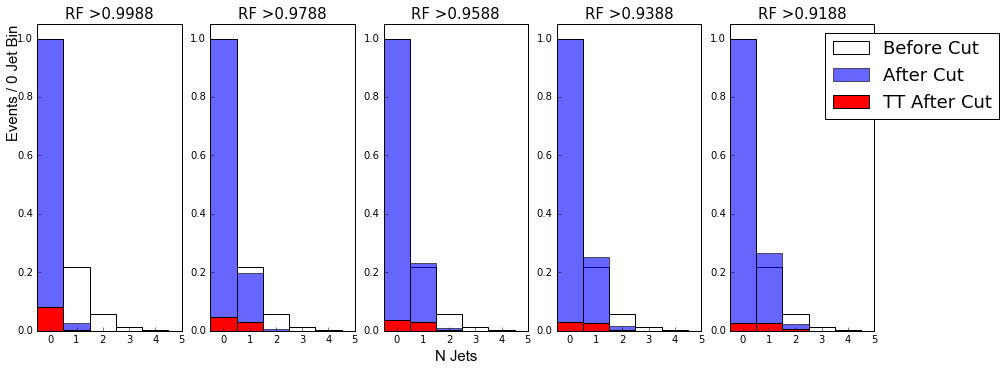

In [120]:
fig, ax = plt.subplots(1,5, figsize=(15, 5.5))
for i in range(len(df_rf_cuts)):
    rectpre = ax[i].bar(bins[i]["TT"][1][:-1], sum_hist(bins_tot)/sum_hist(bins_tot)[0], 1, color='w')
    rect1 = ax[i].bar(bins[i]["TT"][1][:-1], sum_hist(bins[i])/sum_hist(bins[i])[0], 1, color='b', alpha=.6)
    rect = ax[i].bar(bins[i]["TT"][1][:-1], bins[i]["TT"][0]/sum_hist(bins[i])[0], 1, color='r')
    ax[i].set_xlim({5,-0.5})
    ax[i].set_ylim( top= 1.05)
    ax[i].get_xaxis().tick_bottom()
    ax[i].get_yaxis().tick_left()
    ax[i].set_title("RF >"+str(rf_cuts[i]), fontsize=15)
ax[2].set_xlabel("N Jets", va='top', ha='center', fontsize=15, fontname='Arial', position=(.5, 0.))
ax[0].set_ylabel("Events / 0 Jet Bin", va='top', ha='right', fontsize=15, fontname='Arial', position=(-.05, 1.))
ax[0].yaxis.labelpad = 10
plt.legend([rectpre, rect1,rect], ["Before Cut ","After Cut","TT After Cut"], frameon=True,loc=0, fontsize=18,bbox_to_anchor=(.6, 1.) )

In [ ]:
bins[i]["TT"]

In [ ]:
bins_rf = {}
for process in scales.keys():
    if "WJ" in process:
        continue
    bins_rf[process] = list(np.histogram(df[(df[process]==1) & (df.mll > 50.)  ].dPhiLLJet , bins=75, range=(0,3.14)))
    bins_rf[process][0] = bins_rf[process][0] * scales[process]*(5.27/19.4)

In [ ]:
colors = {"WW": (0.993248, 0.906157, 0.143936),\
          "DY": (0.344074, 0.780029, 0.397381),\
          "TT": (0.121380, 0.629492, 0.531973),\
          "ZZ": (1. ,  0.85490196,  0.7254902 ),\
          "WZ": (0.165117, 0.467423, 0.558141),\
          "WJ": (0.267004, 0.004874, 0.329415)}

fig, ax = plt.subplots(figsize=(12, 6))

rect = []
processes = [ "WW", "TT", "WZ", "ZZ", "DY"]
sum_bins = np.zeros(len(bins_rf[processes[0]][0]))
for process in processes:
    #if len(rect) == 0:
    #    bottom = 0
    #else:
    bottom = sum_bins

    rect.append(ax.bar( bins_rf[process][1][:-1], bins_rf[process][0],
                      bins_rf[process][1][1]-bins_rf[process][1][0] , color = colors[process],
                      edgecolor = colors[process], bottom=bottom ))
    sum_bins +=bins_rf[process][0] 




ax.set_yscale("log", nonposy='clip')
ax.set_xlim([0, 3.14])
ax.set_ylim( bottom=1,  top= sum_bins.max()*20.)
plt.legend(rect, processes, frameon=False)

In [ ]:
sum_bins.max()

In [ ]:
.9988

In [ ]:
scales

In [ ]:
def bin_df( df, binned_feature, scales=scales, range=None,bins=100, lumi_scale=(5.27/19.4)):
    bins_rf = {}
    
    for process in scales.keys():
        if "WJ" in process:
            continue
        bins_rf[process] = list(np.histogram(df[ (df[process]==1) ][binned_feature] , bins=bins, range=range))
        bins_rf[process][0] = bins_rf[process][0] * scales[process]*lumi_scale
    return bins_rf

In [ ]:
def plot_hist( bins, processes=[ "WW", "TT", "WZ", "ZZ", "DY"], x_range=None, y_range=None, title=None, y_label=None, color=colors, logy=True, x_minor_ticks=True):
    
    fig, ax = plt.subplots(figsize=(11, 5.5))

    rect = []
    sum_bins = np.zeros(len(bins[processes[0]][0]))
    for process in processes:

        bottom = sum_bins
        rect.append(ax.bar( bins[process][1][:-1], bins[process][0],
                          bins[process][1][1]-bins[process][1][0] , color = colors[process],
                          edgecolor = colors[process], bottom=bottom ))
        sum_bins +=bins[process][0] 

    #ax.text(2, 2, r'an equation: $E=mc^2$', fontsize=15,verticalalignment='top', horizontalalignment='left')
        
    
    #Configurables
    ax.set_yscale("log", nonposy='clip')
    if x_range!=None:ax.set_xlim(x_range)
    if y_range==None:ax.set_ylim( bottom=1,  top= sum_bins.max()*20.)

    if y_label != None:
        plt.ylabel(y_label, position=(-0.5, 1.), va='top', ha='right', fontsize=14, fontname='Arial')
    if title != None:
        plt.xlabel( title, position=(1., 0.), va='bottom', ha='right', fontsize=14, fontname='Arial')
        
    plt.legend(rect, processes, frameon=False, fontsize="x-large")
    
    ####################################
    #Add minor tick marks to the x-axis
    if x_minor_ticks == False:
        loc = matplotlib.ticker.MultipleLocator(base=1) # this locator puts ticks at regular intervals
        ax.xaxis.set_major_locator(loc)
    else:
        for i in ax.xaxis.majorTicks:
            print i.get_loc()
        loc = matplotlib.ticker.MultipleLocator( (bins[process][1][-1] - bins[process][1][0])/25. ) # this locator puts ticks at regular intervals
        ax.xaxis.set_minor_locator(loc)
    
    ###################################
    #Increase major tick label sizes
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(16)
    ###################################
    # alter tick lengths
    ax.yaxis.set_tick_params(length=10)
    ax.yaxis.set_tick_params(which='minor',length=5)
    ax.xaxis.set_tick_params(length=10)
    ax.xaxis.set_tick_params(which='minor',length=5)
        
        
    ax.xaxis.labelpad = 20
    ax.yaxis.labelpad = 20
    
    plt.tight_layout()
    return fig, ax

In [ ]:
["TT","DY","WW","ZZ","WZ"]

In [87]:
bins = bin_df(df[(df.mll > 50) ], "rf_result", range=(-1.01,1.01), lumi_scale=1, bins=100)

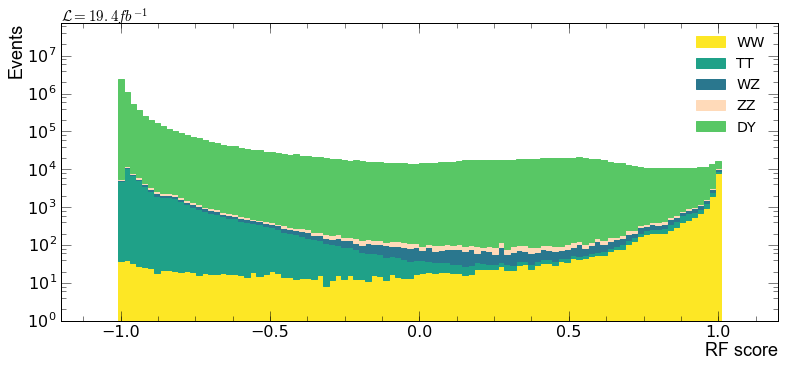

In [90]:
plot = plot_hist(bins, title=r"RF score", y_label="Events", x_range=(-1.2,1.2), x_minor_ticks=True)
plot[1].text(0, 1,r"$\mathcal{L}=19.4 fb^{-1}$", ha='left', fontsize=15, transform=plot[1].transAxes)
plot[1].xaxis.set_minor_locator( matplotlib.ticker.MultipleLocator( 1./8. ))

In [66]:
plot[0].savefig("../new_rf_result_eu.png")

In [45]:
plt.legend?

In [104]:
bins = bin_df(df[(df.mll > 50) & (df.rf_result > .98 )], "mll", range=(0,250), lumi_scale=1, bins=100)

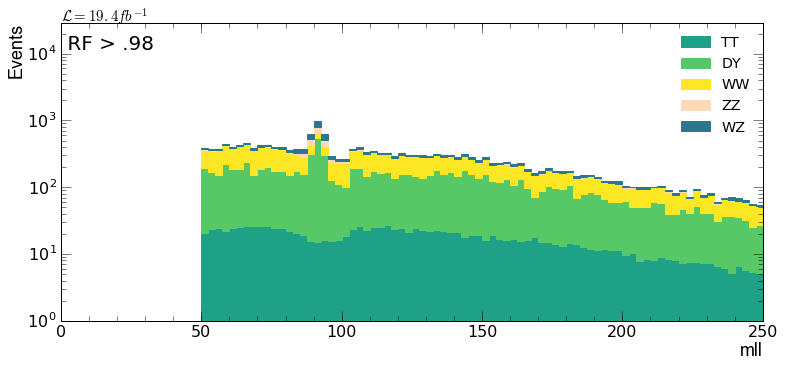

In [105]:
plot = plot_hist(bins, title=r"mll", processes=["TT","DY","WW","ZZ","WZ"],y_label="Events", x_range=(0,250), x_minor_ticks=True)
plot[1].text(0, 1,r"$\mathcal{L}=19.4 fb^{-1}$", ha='left', fontsize=15, transform=plot[1].transAxes)
plot[1].text(0,.91,r" RF > .98", ha='left', fontsize=20, transform=plot[1].transAxes)

In [108]:
bins = bin_df(df[(df.mll > 50) & (df.rf_result > .98 )], "numb_jets", range=(-0.5,4.5), lumi_scale=1, bins=5)

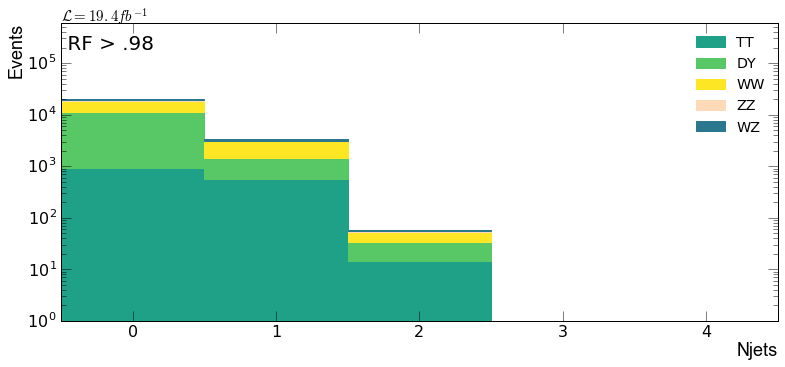

In [109]:
plot = plot_hist(bins, title=r"Njets", processes=["TT","DY","WW","ZZ","WZ"], y_label="Events", x_range=(-0.5,4.50), x_minor_ticks=False)
plot[1].text(0, 1,r"$\mathcal{L}=19.4 fb^{-1}$", ha='left', fontsize=15, transform=plot[1].transAxes)
plot[1].text(0,.91,r" RF > .98", ha='left', fontsize=20, transform=plot[1].transAxes)

In [121]:
(df[df.WW==1].shape[0]*scales["WW"])

18576.692854832916